# Parkinsons Tablet Graph Data #

### Source: ###

### [UCI Machine Learning Repository Link](https://archive.ics.uci.edu/ml/datasets/Parkinson+Disease+Spiral+Drawings+Using+Digitized+Graphics+Tablet)

#### 1. M. Erdem ISENKUL, PhD., ####
    - Istanbul University, 
    - Department of Computer Engineering, 
    - 34320, Istanbul, Turkey 
    - Phone: +90 (212) 473 7070 - 17455 
    - Email: eisenkul@istanbul.edu.tr 
----------------------------------- 
#### 2. Betul ERDOGDU SAKAR, PhD., ####
    - Bahcesehir University, 
    - Department of Software Engineering, 
    - 34381, Istanbul, Turkey 
    - Phone: +90 (212) 381 0589 
    - Email: betul.erdogdu@eng.bahcesehir.edu.tr

In [1]:
import re

from urllib.request import urlretrieve
from zipfile import ZipFile
from itertools import chain

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

import bokeh as bk
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Slider, LinearInterpolator
from bokeh.io import curdoc, show, output_notebook, push_notebook, output_file
from bokeh.layouts import widgetbox, column, row, gridplot
from bokeh.plotting import figure

output_notebook()
#output_file('parkinsons.html')

plt.style.use('seaborn-muted')

Loading BokehJS ...

## Loading the files: ZipFile and regex

In [2]:
file_address = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00395/PARKINSON_HW.zip'

In [3]:
zip_retrieved = urlretrieve(file_address,'parkinsons.zip')

In [4]:
zip_retrieved

('parkinsons.zip', <http.client.HTTPMessage at 0x2737ce47f0>)

In [5]:
zip_get = ZipFile(zip_retrieved[0],'r')

In [6]:
zip_get

<zipfile.ZipFile filename='parkinsons.zip' mode='r'>

In [7]:
list_of_files = ZipFile.extractall(zip_get)

In [8]:
print(list_of_files)

None


In [9]:
zip_get.namelist()[:10]

['hw_dataset/',
 'hw_dataset/control/',
 'hw_dataset/control/C_0001.txt',
 'hw_dataset/control/C_0002.txt',
 'hw_dataset/control/C_0003.txt',
 'hw_dataset/control/C_0004.txt',
 'hw_dataset/control/C_0005.txt',
 'hw_dataset/control/C_0006.txt',
 'hw_dataset/control/C_0007.txt',
 'hw_dataset/control/C_0008.txt']

In [10]:
pattern = re.compile('.+\/.+[CPH]+.+\.txt$')

In [11]:
list_of_texts = sorted(list(set(chain.from_iterable([re.findall(pattern,i) for i in zip_get.namelist()]))))

In [12]:
list_of_texts[:10]

['hw_dataset/control/C_0001.txt',
 'hw_dataset/control/C_0002.txt',
 'hw_dataset/control/C_0003.txt',
 'hw_dataset/control/C_0004.txt',
 'hw_dataset/control/C_0005.txt',
 'hw_dataset/control/C_0006.txt',
 'hw_dataset/control/C_0007.txt',
 'hw_dataset/control/C_0008.txt',
 'hw_dataset/control/C_0009.txt',
 'hw_dataset/control/C_0010.txt']

In [13]:
control_pattern = r'.*\/control\/.*\.txt$'
park_pattern =r'.*\/parkinson\/.*\.txt$'

In [14]:
control_files = sorted(list(chain.from_iterable([re.findall(control_pattern,i) for i in list_of_texts])))
park_files = sorted(list(chain.from_iterable([re.findall(park_pattern,i) for i in list_of_texts])))

In [15]:
control_files

['hw_dataset/control/C_0001.txt',
 'hw_dataset/control/C_0002.txt',
 'hw_dataset/control/C_0003.txt',
 'hw_dataset/control/C_0004.txt',
 'hw_dataset/control/C_0005.txt',
 'hw_dataset/control/C_0006.txt',
 'hw_dataset/control/C_0007.txt',
 'hw_dataset/control/C_0008.txt',
 'hw_dataset/control/C_0009.txt',
 'hw_dataset/control/C_0010.txt',
 'hw_dataset/control/C_0011.txt',
 'hw_dataset/control/C_0012.txt',
 'hw_dataset/control/C_0013.txt',
 'hw_dataset/control/C_0014.txt',
 'hw_dataset/control/C_0015.txt']

In [16]:
park_files[-10:]

['new_dataset/parkinson/H_P000-0037.txt',
 'new_dataset/parkinson/H_P000-0039.txt',
 'new_dataset/parkinson/H_P000-0040.txt',
 'new_dataset/parkinson/H_p000-0010.txt',
 'new_dataset/parkinson/H_p000-0017.txt',
 'new_dataset/parkinson/H_p000-0018.txt',
 'new_dataset/parkinson/H_p000-0028.txt',
 'new_dataset/parkinson/H_p000-0041.txt',
 'new_dataset/parkinson/H_p000-0042.txt',
 'new_dataset/parkinson/H_p000-0043.txt']

## Reading the data into Pandas DataFrame

In [17]:
column_names = ['X' , 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'Test ID']

In [18]:
df = pd.read_csv(control_files[0],';',names=column_names)

In [19]:
df.head()

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID
0,200,204,0,73,910,1732647300,0
1,200,204,0,218,900,1732647307,0
2,200,204,0,253,900,1732647314,0
3,200,204,0,304,900,1732647321,0
4,200,204,0,351,900,1732647328,0


In [20]:
df_2 = pd.read_csv(control_files[1],';',names=column_names)
df_2.head()

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID
0,199,202,0,126,860,1732464831,0
1,199,202,0,202,860,1732464838,0
2,199,202,0,276,860,1732464845,0
3,199,202,12,328,860,1732464852,0
4,199,202,0,373,860,1732464859,0


In [21]:
df_2['ZeroedTimeStamp'] = df_2['Timestamp'] - df_2['Timestamp'].min()

In [22]:
df_2.head()

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID,ZeroedTimeStamp
0,199,202,0,126,860,1732464831,0,0
1,199,202,0,202,860,1732464838,0,7
2,199,202,0,276,860,1732464845,0,14
3,199,202,12,328,860,1732464852,0,21
4,199,202,0,373,860,1732464859,0,28


In [23]:
df_2.set_index('ZeroedTimeStamp',inplace=True)

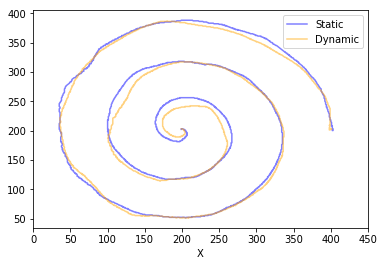

In [24]:
ax = df_2[df_2['Test ID'] == 0].plot(x='X',y='Y',color='blue',alpha=0.5)
df_2[df_2['Test ID'] == 1].plot(x='X',y='Y',ax=ax,color='orange',alpha=0.5)
plt.xlim([0,450])
plt.legend(['Static','Dynamic'])
plt.show()

In [25]:
df_2[df_2['Test ID'] == 1].head()

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID
ZeroedTimeStamp,,,,,,,
39710,199,203,0,20,950,1732504541,1
39717,199,203,0,130,970,1732504548,1
39724,199,203,0,194,960,1732504555,1
39731,199,203,0,264,950,1732504562,1
39738,199,203,0,319,950,1732504569,1


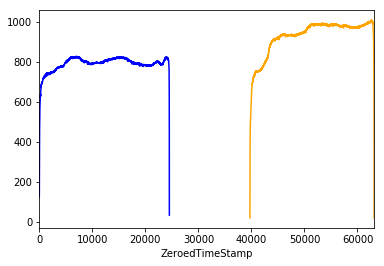

In [26]:
ax = df_2[df_2['Test ID'] == 0].Pressure.plot(color='blue')
df_2[df_2['Test ID'] == 1].Pressure.plot(color='orange')
plt.show()

- Need to group dataframes by test to get the same zeroed timestamp

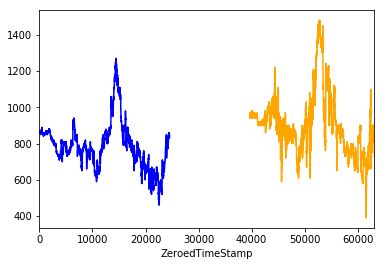

In [27]:
ax = df_2[df_2['Test ID'] == 0].GripAngle.plot(color='blue')
df_2[df_2['Test ID'] == 1].GripAngle.plot(color='orange')
plt.show()

In [28]:
df_2['Test ID'] = df_2['Test ID'].astype('str')

In [29]:
size_map = LinearInterpolator(
    x = [600, df_2['Pressure'].max()],
    y = [2,15]
)

In [30]:
source = ColumnDataSource(df_2)

In [31]:
colormap = CategoricalColorMapper(factors=['0','1'],palette=['blue','orange'])

In [32]:
fig = figure(title='Control Tablet Results: Static vs. Dynamic Test')

In [33]:
fig.circle('X','Y',source=source,color={'field':'Test ID','transform':colormap},size={'field':'Pressure','transform':size_map},alpha=.05)
#fig.legend(['Dynamic vs. Static'])
fig.title.text_color='olive'

In [34]:
show(fig)

Might be a little hard to decipher from this graph, but for this control example, the pressure increased during the dynamic test (stress induced?)

In [35]:
df.head()

,X,Y,Z,Pressure,GripAngle,Timestamp,Test ID
0,200,204,0,73,910,1732647300,0
1,200,204,0,218,900,1732647307,0
2,200,204,0,253,900,1732647314,0
3,200,204,0,304,900,1732647321,0
4,200,204,0,351,900,1732647328,0


In [36]:
df_static = df[df['Test ID'] == 0]
df_dynamic = df[df['Test ID'] == 1]

In [37]:
df_static['ZeroedTimestamp'] = df_static['Timestamp'] - df_static['Timestamp'].min()
df_dynamic['ZeroedTimestamp'] = df_dynamic['Timestamp'] - df_dynamic['Timestamp'].min()

C:\Users\mgavin\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mgavin\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
df_combined = df_static.merge(df_dynamic,how='inner',suffixes=['_S','_D'],left_on='ZeroedTimestamp',right_on='ZeroedTimestamp')

In [39]:
df_combined.head()

,X_S,Y_S,Z_S,Pressure_S,GripAngle_S,Timestamp_S,Test ID_S,ZeroedTimestamp,X_D,Y_D,Z_D,Pressure_D,GripAngle_D,Timestamp_D,Test ID_D
0,200,204,0,73,910,1732647300,0,0,200,203,0,66,800,1732617691,1
1,200,204,0,218,900,1732647307,0,7,200,203,0,136,800,1732617698,1
2,200,204,0,253,900,1732647314,0,14,200,203,0,196,800,1732617705,1
3,200,204,0,304,900,1732647321,0,21,200,203,0,248,820,1732617712,1
4,200,204,0,351,900,1732647328,0,28,200,203,0,289,810,1732617719,1


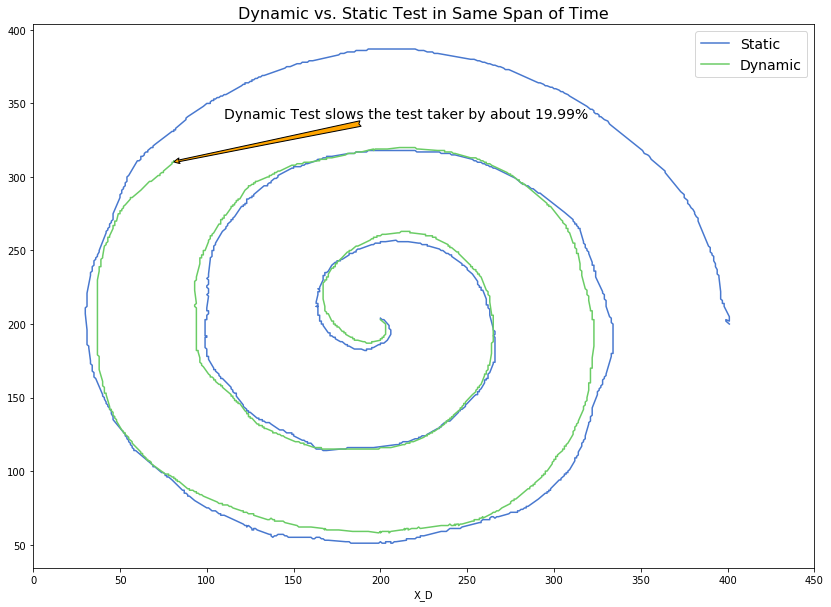

In [40]:
ax = df_combined.plot('X_S','Y_S',figsize=(14,10))
df_combined.plot('X_D','Y_D',ax=ax)
plt.xlim([0,450])
plt.legend(['Static','Dynamic'],fontsize=14)
plt.annotate('Dynamic Test slows the test taker by about {:.2%}'.format(1-len(df_static)/len(df_dynamic)),xy=[80,310],xytext=[110,340],arrowprops={'facecolor':'orange','arrowstyle':'fancy'},fontsize=14)
plt.title('Dynamic vs. Static Test in Same Span of Time',fontsize=16)
plt.show()

In [41]:
df_combined_with_zero = df_static.merge(df_dynamic,how='inner',suffixes=['_S','_D'],left_on='ZeroedTimestamp',right_on='ZeroedTimestamp')

In [42]:
df_combined_with_zero.fillna(0,inplace=True)

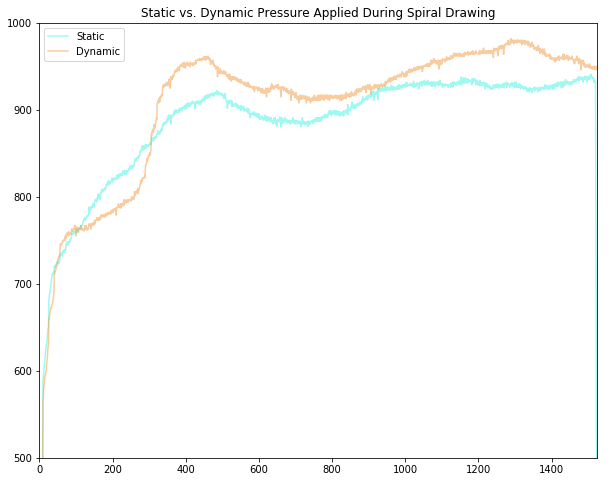

In [43]:
ax = df_combined_with_zero['Pressure_S'].plot(color='#41f4e2',alpha=0.5,figsize=(10,8),label='Static')
df_combined_with_zero['Pressure_D'].plot(ax=ax,color='#f49b42',alpha=0.5,label='Dynamic')
plt.ylim([500,1000])
plt.title('Static vs. Dynamic Pressure Applied During Spiral Drawing')
plt.legend()
plt.show()

- Once again illustrating that there is more pressure applied to the tablet during dynamic spiral test

In [44]:
x = np.arange(0,1.001,.001)
y = 3*-2*np.pi*x

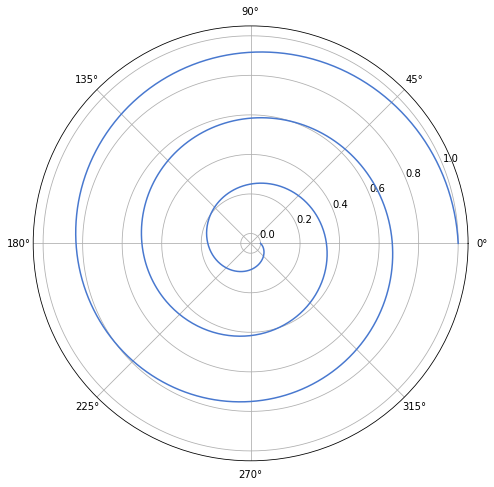

In [45]:
figg = plt.figure(figsize=(10,8))
ax = figg.add_subplot(111,polar=True)
ax.plot(y,x)
plt.show()

In [46]:
x_array = df_combined.iloc[:,0].values

x_rate = np.zeros_like(x_array)

for i in range(len(x_array)):
    if i == 0:
        x_rate[i] = 1
    else:
        x_rate[i] = abs(x_array[i] - x_array[i-1])

In [47]:
y_array = df_combined.iloc[:,1].values

y_rate = np.zeros_like(y_array)

for i in range(len(y_array)):
    if i == 0:
        y_rate[i] = 1
    else:
        y_rate[i] = abs(y_array[i] - y_array[i-1])

In [48]:
x_array = x_array - 200

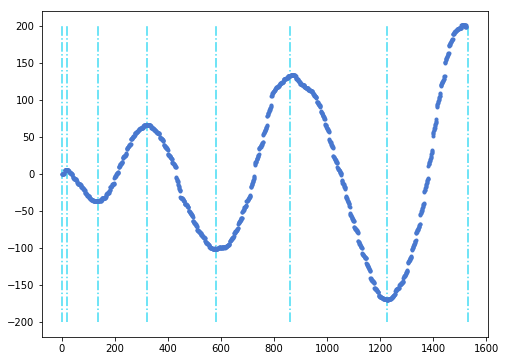

In [49]:
plt.figure(figsize=(8,6))
plt.plot(x_array,linestyle='none',marker='.')
plt.vlines([0,20,135,320,580,860,1225,1530],-200,200,linestyles='-.',colors='#42dcf4')
plt.show()

In [214]:
x = np.arange(1600)

freq = 3/len(x_array)
x_wave = -x/8* (np.sin((5.5*x*freq)))

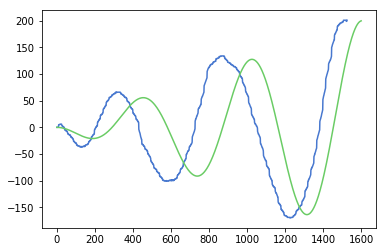

In [215]:
plt.plot(x_array)

plt.plot(x_wave)
plt.show()